# Overview Performance

In [ ]:
import pandas as pd
import numpy as np
import datetime

## Import Data Source

In [ ]:
# data_src = "/Users/ruzlim/Code/Jupyter//Raw_Agg_Performance.csv"
# data_src = "c/Users/Narut4/coding/Jupyter/Raw_Agg_Performance.csv"

data_src = "Raw-Agg Perf_Wk 2023021.csv"
df = pd.read_csv(data_src)
df.head()

## Analyze Data

In [ ]:
df.shape

In [ ]:
df.dtypes

In [ ]:
df.describe()

In [ ]:
df.mean(numeric_only=True)

In [ ]:
# Check null value in each column

df.apply(lambda x: sum(x.isnull()), axis=0)

In [ ]:
# Fullfill null value example

# df_tmp = df

# df_tmp['TARGET_AGG'].fillna(df_tmp['TARGET_AGG'].mean(), inplace=True)

# df_tmp.apply(lambda x: sum(x.isnull()), axis=0)

# df_tmp

In [ ]:
# df['CENTER'].unique()
# df['PRODUCT_GRP'].unique()
df['METRIC_GRP'].unique()
# df['METRIC_CD'].unique()
# df['METRIC_NAME'].unique()

# df.loc[:, ['METRIC_CD', 'METRIC_NAME']]

# df_bg_agg_actual_mth = pd.DataFrame(df_bg.groupby(['TM_KEY_MTH', 'METRIC_CD', 'METRIC_NAME'])['ACTUAL_AGG'].sum().reset_index())

# columns = ['Date','Fee']
# df2 = df[columns].groupby(df['Courses']).nunique() 

# df_grp = df.loc[:, ['METRIC_CD', 'METRIC_NAME']].groupby
# df_grp = df.groupby(['METRIC_CD', 'METRIC_NAME']).value_counts()
# df_grp = df.groupby(['METRIC_CD', 'METRIC_NAME']).transform('count')
# df_grp = df.groupby(['METRIC_CD', 'METRIC_NAME']).sum(1)
# df_grp = df[['METRIC_CD', 'METRIC_NAME']].groupby(df['METRIC_CD']).nunique()

# df_grp

## Business Growth

In [ ]:
# df_bg = df[(df['CENTER'] == 'Sales & Revenue') & (df['BG_FLAG'] == 'Y')]
df_bg = df[(df['BG_FLAG'] == 'Y') | ('METRIC_NAME' == 'TDG Revenue (Performance View)')]
df_bg.head()

In [ ]:
df_bg.shape

In [ ]:
df_bg.describe()

In [ ]:
# df_bg.sort_values(by=['TM_KEY_MTH', 'TM_KEY_WK', 'CENTER', 'METRIC_GRP', 'COMP_CD', 'PRODUCT_GRP', 'METRIC_CD'], ascending=True)
# df_bg.head()

## Monthly Aggregate

In [ ]:
df_bg_agg_actual_mth = pd.DataFrame(df_bg.groupby(['TM_KEY_MTH', 'METRIC_CD', 'METRIC_NAME'])['ACTUAL_AGG'].sum().reset_index())
df_bg_agg_actual_mth.rename(columns={'ACTUAL_AGG': 'AGG'}, inplace=True)
df_bg_agg_actual_mth['MEASURE'] = 'ACTUAL'
# df_bg_agg_actual_mth.head()

df_bg_agg_target_mth = pd.DataFrame(df_bg.groupby(['TM_KEY_MTH', 'METRIC_CD', 'METRIC_NAME'])['TARGET_AGG'].sum().reset_index())
df_bg_agg_target_mth.rename(columns={'TARGET_AGG': 'AGG'}, inplace=True)
df_bg_agg_target_mth['MEASURE'] = 'TARGET'
# df_bg_agg_target_mth.head()

df_bg_agg_mth = pd.concat([df_bg_agg_actual_mth, df_bg_agg_target_mth])
df_bg_agg_mth['AGG'] = df_bg_agg_mth['AGG'] / 1000000
df_bg_agg_mth.head()

In [ ]:
df_bg_agg_mth_pivot = df_bg_agg_mth.pivot(index=['TM_KEY_MTH', 'MEASURE'], columns=['METRIC_CD', 'METRIC_NAME'], values='AGG')
df_bg_agg_mth_pivot

In [ ]:
df_bg_agg_mth_pivot.T.round(2)

## Weekly Aggregate

In [ ]:
df_bg_agg_actual_wk = pd.DataFrame(df_bg.groupby(['TM_KEY_WK', 'METRIC_CD', 'METRIC_NAME'])['ACTUAL_AGG'].sum().reset_index())
df_bg_agg_actual_wk.rename(columns={'ACTUAL_AGG': 'AGG'}, inplace=True)
df_bg_agg_actual_wk['MEASURE'] = 'ACTUAL'
# df_bg_agg_actual_wk.head()

df_bg_agg_target_wk = pd.DataFrame(df_bg.groupby(['TM_KEY_WK', 'METRIC_CD', 'METRIC_NAME'])['TARGET_AGG'].sum().reset_index())
df_bg_agg_target_wk.rename(columns={'TARGET_AGG': 'AGG'}, inplace=True)
df_bg_agg_target_wk['MEASURE'] = 'TARGET'
# df_bg_agg_target_wk.head()

df_bg_agg_wk = pd.concat([df_bg_agg_actual_wk, df_bg_agg_target_wk])
df_bg_agg_wk['AGG'] = df_bg_agg_wk['AGG'] / 1000000
df_bg_agg_wk.head()

In [ ]:
df_bg_agg_wk_pivot = df_bg_agg_wk.pivot(index=['TM_KEY_WK', 'MEASURE'], columns=['METRIC_CD', 'METRIC_NAME'], values='AGG')
df_bg_agg_wk_pivot

In [ ]:
output_data = df_bg_agg_wk_pivot.T
output_data.round(2)

## Generate Output File

In [ ]:
output_file = data_src.replace("Raw-Agg", "BG").replace(".csv", ".xlsx")

# output_data.to_excel(output_file)

print(f'\n"{output_file}" is generated')

## Visualization
##### https://matplotlib.org/stable/tutorials/introductory/pyplot.html

In [114]:
import matplotlib.pyplot as plt

In [115]:
# df_bg_agg_1 = pd.DataFrame(df_bg.groupby(['TM_KEY_MTH', 'TM_KEY_WK', 'METRIC_CD', 'METRIC_NAME'])['ACTUAL_AGG'].sum().reset_index())
# df_bg_agg_1

# df_bg_agg_2 = pd.DataFrame(df_bg.groupby(['TM_KEY_MTH', 'TM_KEY_WK', 'METRIC_CD', 'METRIC_NAME'])['ACTUAL_AGG'].agg(['sum', 'count']).reset_index())
# df_bg_agg_2

df_bg_agg = pd.DataFrame(df_bg.groupby(['TM_KEY_MTH', 'TM_KEY_WK', 'METRIC_CD', 'METRIC_NAME']).agg({'ACTUAL_AGG': 'sum', 'TARGET_AGG': 'sum'}).reset_index())
df_bg_agg['ACTUAL_AGG'] = df_bg_agg['ACTUAL_AGG'] / 1000000
df_bg_agg['TARGET_AGG'] = df_bg_agg['TARGET_AGG'] / 1000000
df_bg_agg.head()

,TM_KEY_MTH,TM_KEY_WK,METRIC_CD,METRIC_NAME,ACTUAL_AGG,TARGET_AGG
0,202303,2023009,B1R000100,Prepaid Revenue,669.901008,626.219335
1,202303,2023009,B2R000100,Postpaid Revenue,1157.226110,1165.611851
2,202303,2023009,TB3R000100,TOL Revenue,189.713166,205.173356
3,202303,2023009,TB4R000100,TVS Revenue,42.430646,47.555946
4,202303,2023009,TNSC00142,TDG Revenue (Performance View),0.000000,0.000000


In [ ]:
mth = df_bg_agg['TM_KEY_MTH'].unique()

# df_bg_pivot = df_bg_agg.groupby('TM_KEY_MTH')['ACTUAL_AGG'].sum()
df_bg_pivot_mth = df_bg_agg.groupby('TM_KEY_MTH').sum(numeric_only=True).round(2)
df_bg_pivot_mth

In [ ]:
plt.figure(figsize=(12,6))
plt.bar(mth, df_bg_pivot_mth['ACTUAL_AGG'])
# plt.xticks(mth, rotation='vertical')
plt.xticks(mth, rotation='horizontal')
plt.xlabel('Month')
plt.ylabel('Actual (mb.)')
plt.show()

In [116]:
bg_wk_label = df_bg_agg['TM_KEY_WK'].unique()
bg_wk_label

array([2023009, 2023010, 2023011, 2023012, 2023013, 2023014, 2023015,
       2023016, 2023017, 2023018, 2023019, 2023020, 2023021])

In [117]:
# df_bg_pivot_wk = df_bg_agg.groupby('TM_KEY_WK')['ACTUAL_AGG'].sum()
bg_wk_agg = df_bg_agg.groupby('TM_KEY_WK').sum(numeric_only=True).round(2)
# bg_wk_agg

bg_wk_val = bg_wk_agg['ACTUAL_AGG']
bg_wk_val

TM_KEY_WK
2023009     2059.27
2023010     5189.97
2023011     8283.24
2023012    10787.84
2023013    13919.89
2023014     3831.38
2023015     7158.35
2023016     9645.46
2023017    12456.00
2023018     3376.25
2023019     6136.33
2023020     8647.07
2023021     9349.04
Name: ACTUAL_AGG, dtype: float64

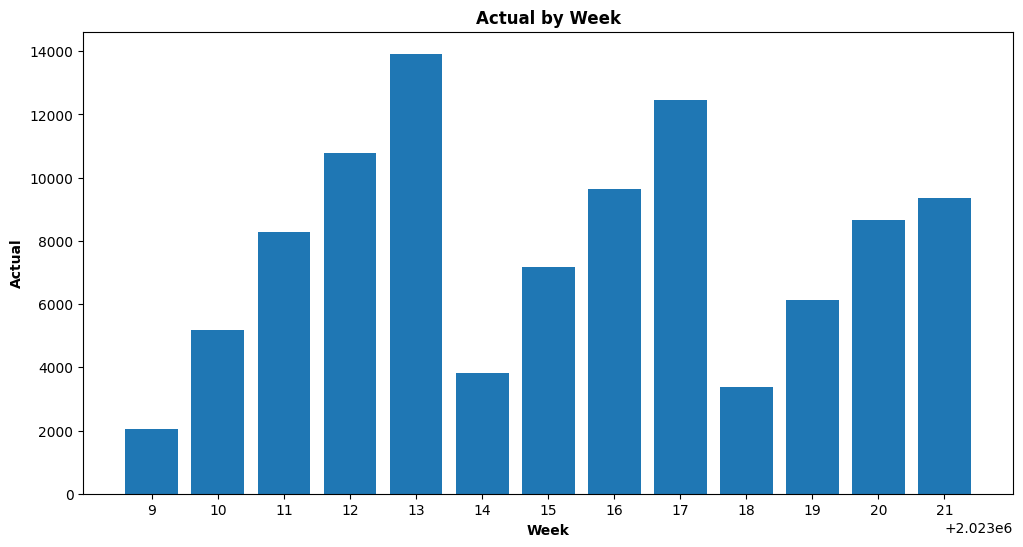

In [122]:
plt.figure(figsize=(12,6))

plt.bar(bg_wk_label, bg_wk_val)

# plt.plot(bg_wk_label, bg_wk_agg['ACTUAL_AGG'], marker='.', markeredgewidth=3, markeredgecolor='red')
# plt.plot(bg_wk_label, bg_wk_val, marker='.', markeredgewidth=3, markeredgecolor='red')
# plt.grid()

plt.xticks(bg_wk_label, rotation='horizontal')
plt.title('Actual by Week', fontdict={'fontweight': 'bold'})
plt.xlabel('Week', fontdict={'fontweight': 'bold'})
plt.ylabel('Actual', fontdict={'fontweight': 'bold'})
plt.show()